In [455]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [456]:
## object orientation allows you to look at lots of data files in parallel to eachother 

In [463]:
class load_patch: 

    def __init__(self, path):
        self.path = path
        self.load_data(path)
        self.edit_data()
        self.save_name()
        

    def save_name(self):
        path = self.path 
        filename = os.path.basename(path)  # This will get '20221017_005.mat'
        variable_name = os.path.splitext(filename)[0]  # This will remove the extension, giving you '20221017_005'

        self.variable_name = variable_name
        print(variable_name)
        # Now you can use variable_name in your code
        return variable_name


    def load_data(self, path):
        path = self.path
        data = loadmat(path)
        self.data = data
        print("total sweeps: " + str(len(data)))
        return data


    def edit_data(self):
        # data = self.load_data()
        #give access to variable names inside functions 
        data = self.data
        
        new_data = data.copy()  # Create a copy of the original dictionary

        for i in range(4):  # Remove the first three keys from the copy
            first_sweep_key = list(new_data.keys())[0]
            new_data.pop(first_sweep_key)

        for i in range(len(new_data.keys())):  
            first_sweep_key = list(new_data.keys())[i]
            first_value = new_data[first_sweep_key]

        self.new_data = new_data
        print('done1')
        return new_data 
        

    def plot_sweeps(self, start_time, end_time, initial_sweep, final_sweep): 
        
        new_data = self.new_data
        plt.figure(figsize=(10, 6))

        # Plot pA data over time for each trial
        for trial_name, pA in list(new_data.items())[initial_sweep:final_sweep]:
            pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
            times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
            plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
            #break  # Break the loop after the first iteration
            
        #look only at specific time points for your base amp pre stim
        plt.ylim(-1000, 800) # adjust data range in pA
        plt.xlim(start_time, end_time) # adjust this according to your data range in pA


        plt.xlabel('Time (ms)')  # Add a label to the x-axis
        plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
        plt.title('Base amp')  # Add a title

        plt.grid(True)  
        return('done')

    def calculate_first_window(self,peak_window_start = 100, peak_window_end = 150): 
        all_first_peaks = []
        new_data = self.new_data
        count = 0
        for key, value in new_data.items():
            count += 1
       
            all_first_peaks.append(value[0][peak_window_start:peak_window_end]*(10**12))

        self.all_first_peaks = all_first_peaks
        return all_first_peaks
    
  
  
    def first_peak(self):
        self.calculate_first_window()
        all_first_peaks = self.all_first_peaks
        

        first_peak_list = []
        count = 0 
        for first_peak in all_first_peaks:

            first_peak = min(all_first_peaks[count])
            count += 1
            first_peak_list.append(first_peak)

        self.first_peak = first_peak
        return first_peak_list

    def time_correlates(self):
        new_data = self.new_data

        count = 0
        times = []
        for time in new_data:

            times.append(count)
            count += 0.333
        
        self.times = times
        return times

    def peak_df(self):
        variable_name = self.variable_name
        times = self.time_correlates()
        first_peak_list = self.first_peak()
        # times = self.times
        # first_peak_list = self.first_peak_list

        df = pd.DataFrame(
            {'first_peak': first_peak_list,
            'time': times}
             )

        df.to_csv('/Users/joyadler/Desktop/patch_df/' + variable_name + ".csv" )





# time_correlate = {}

# # Calculate the time in minutes for each sweep and add it to the new dictionary
# for i, sweep_key in enumerate(new_data.keys()):
#     sweep_time_minutes = i * 0.3333  # Each sweep occurs every 20 seconds (0.3333 minutes)
#     time_correlate[sweep_time_minutes] = new_data[sweep_key]

#     print("Time (minutes):", sweep_time_minutes)
#     print("Sweep data:", time_correlate[sweep_time_minutes])
#     print(' ')




            # print(value[0][peak_window_start:peak_window_end])
        
      

            # print(value[peak_window_start:peak_window_end])
            # print(len(value))

        



In [464]:
path = '/Users/joyadler/Documents/GitHub/Analysis_code/20221017_001.mat'
patch = load_patch(path) #instance of a class

total sweeps: 79
done1
20221017_001


In [466]:
path = '/Users/joyadler/Documents/GitHub/Analysis_code/20221017_005.mat'
patch = load_patch(path) #instance of a class

total sweeps: 94
done1
20221017_005


In [467]:
patch.peak_df()

In [419]:
patch.time_correlates()

[0,
 0.333,
 0.666,
 0.9990000000000001,
 1.332,
 1.665,
 1.998,
 2.331,
 2.664,
 2.9970000000000003,
 3.3300000000000005,
 3.6630000000000007,
 3.996000000000001,
 4.329000000000001,
 4.662000000000001,
 4.995000000000001,
 5.328000000000001,
 5.661000000000001,
 5.9940000000000015,
 6.327000000000002,
 6.660000000000002,
 6.993000000000002,
 7.326000000000002,
 7.6590000000000025,
 7.992000000000003,
 8.325000000000003,
 8.658000000000003,
 8.991000000000003,
 9.324000000000003,
 9.657000000000004,
 9.990000000000004,
 10.323000000000004,
 10.656000000000004,
 10.989000000000004,
 11.322000000000005,
 11.655000000000005,
 11.988000000000005,
 12.321000000000005,
 12.654000000000005,
 12.987000000000005,
 13.320000000000006,
 13.653000000000006,
 13.986000000000006,
 14.319000000000006,
 14.652000000000006,
 14.985000000000007,
 15.318000000000007,
 15.651000000000007,
 15.984000000000007,
 16.317000000000007,
 16.650000000000006,
 16.983000000000004,
 17.316000000000003,
 17.649,
 17

In [391]:

first_peak_values = patch.first_peak()
print(len(first_peak_values))


[-85.800625, -113.01875, -155.685, -169.929375, -202.96562499999996, -248.5075, -245.23062499999997, -246.09999999999997, -247.43749999999994, -259.140625, -259.408125, -262.9525, -256.733125, -289.903125, -231.454375, -251.85124999999994, -223.63, -238.543125, -231.655, -221.89124999999999, -251.78437499999998, -220.085625, -209.92062499999997, -207.91437499999998, -213.46499999999997, -203.09937499999998, -201.15999999999997, -216.13999999999996, -185.10999999999996, -174.343125, -186.64812499999996, -192.93437499999996, -189.32312499999998, -179.024375, -191.66374999999996, -177.553125, -179.960625, -168.85937499999997, -189.85812499999997, -158.0925, -155.484375, -148.86374999999998, -157.29, -160.63374999999996, -159.22937499999998, -151.00374999999997, -172.60437499999998, -158.76125, -128.19937499999997, -134.95374999999999, -146.3225, -130.874375, -148.261875, -138.230625, -147.125, -142.845, -152.675625, -150.60249999999996, -159.96499999999997, -164.64624999999998, -155.48437

In [333]:
peaks = patch.calculate_first_window()

In [334]:
peaks[2]

array([-146.8575  , -149.331875, -150.535625, -143.580625, -137.09375 ,
       -149.064375, -144.1825  , -151.204375, -146.523125, -155.685   ,
       -131.810625, -143.1125  , -138.16375 , -147.593125, -140.504375,
       -145.453125, -139.76875 , -141.775   , -133.75    , -133.75    ,
       -138.96625 , -128.466875, -130.005   , -128.4     , -133.08125 ,
       -128.6675  , -120.50875 , -132.211875, -132.746875, -126.92875 ,
       -132.145   , -126.460625, -124.855625, -124.320625, -134.5525  ,
       -120.575625, -121.98    , -127.19625 , -124.855625, -123.18375 ,
       -120.174375, -126.66125 , -121.244375, -125.19    , -131.74375 ,
       -126.26    , -110.276875, -121.57875 , -115.894375, -113.486875])

'done'

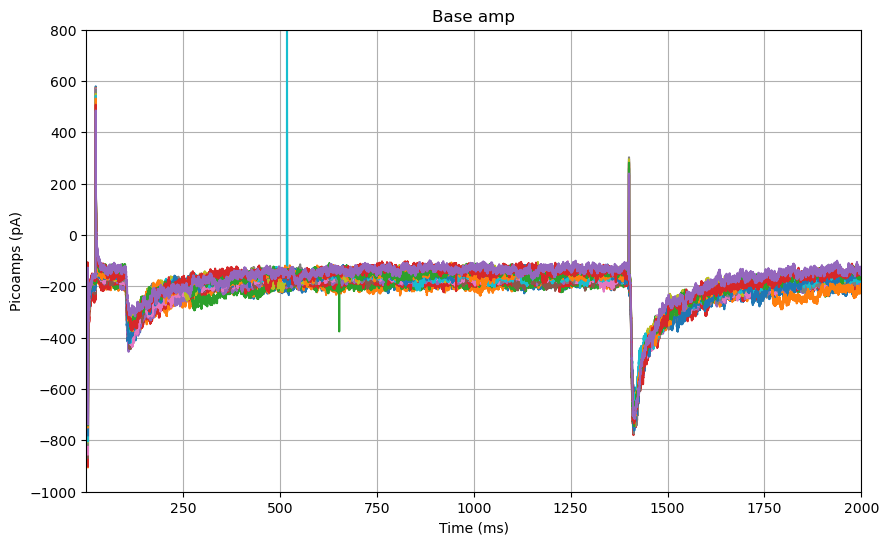

In [348]:
patch.plot_sweeps(1,2000, 10, 25)

In [271]:
path = '/Users/joyadler/Desktop/20221017_001.mat'
patch1 = load_patch(path) #instance of a class

total sweeps: 79
done1


'done'

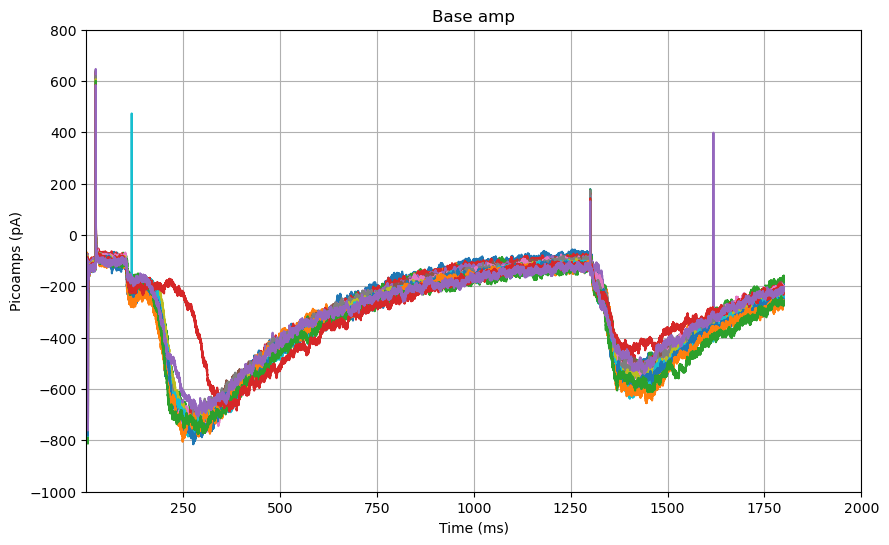

In [103]:
patch1.plot_sweeps(1,2000, 10, 25)